# Lab 1 

In [1]:
import scipy.stats

## A little statistics

### &nbsp;&nbsp;&nbsp;1. Converting a probability into a 'sigma'.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A. Reading (no code needed)

In my reading of what a normal distribution is, there were several main points covered. Frist of all, it is also known as a Gaussian Distribution. It is a distribution centered on a mean. The width of the curve is based on a variable known as sigma. 68% of all data points in a Gaussian Distribution will be within plus or minus 1 sigma of the mean, while 95% will be within 2, and 99.7% within 3. The more sigma from the mean that one goes, the closer to 100% that one approaches, however, since the Gaussian only approaches zero at the infinites, the only way to get 100% of all possible outcomes is to go infinite sigma away. The integral of any normal distribution will always equal 1, regardless of mean that it is centered on or standard deviation (sigma squared).

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; B. Integrating the standard normal distribution

For this section, I decided to o several integrals. the first was $\int\limits_{-\infty}^{0}PDF(x) dx$, which is just the left half of the Gaussian. As expected, this resulted in 0.5

In [2]:
# Integral from -infinity to 0 PDF (Z = 0)
scipy.stats.norm.cdf(0)

0.5

From here, I tried $\int\limits_{-\infty}^{3}PDF(x) dx$. This resulted in ~0.9987 which is to be expected. Since $\int\limits_{-3\sigma}^{3\sigma}PDF(x) dx = 0.997$, we know that the tails contain ~0.003 of the area. Since we only included the left tail, we would expect to see roughly $0.997+\frac{0.003}{2}$ or about 0.9985

In [3]:
# Integral from -infinity to 3 PDF (Z = 3)
scipy.stats.norm.cdf(3)

0.9986501019683699

I then tried both 0 and 3 for the survival function which worked as predicted. I got the same results as for the cumulative distribution function, which is to be expected.

In [4]:
# Integral from 0 to infinity PDF (Z = 0)
scipy.stats.norm.sf(0)

0.5

In [5]:
# Integral from 3 to infinity of PDF (Z = -3)
scipy.stats.norm.sf(3)

0.0013498980316300933

Next I tried combining the two to do $\int\limits_{-3}^{3}PDF(x) dx$

In [6]:
# Integral from -3 to 3 of PDF
1 - scipy.stats.norm.cdf(-3) - scipy.stats.norm.sf(3)

0.9973002039367398

Finally, I tried the inverse, which is to find the probability of ending up 3 sigma away in either direction from the mean

In [7]:
# Integral from -infitity to -3 plus integral from 3 to infinity of PDF
scipy.stats.norm.cdf(-3) + scipy.stats.norm.sf(3)

0.0026997960632601866

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;C. Determine the associated 'sigma' value

In [8]:
# Sigma of a probability of 0.5
scipy.stats.norm.ppf(0.5)

0.0

In [9]:
# Sigma of a probability of 0.84134 (1 Sigma on Z-Table)
scipy.stats.norm.ppf(0.84134)

0.9999803859660787

In [10]:
# Sigma of a probability of 0.97725 (2 Sigma on Z-Table)
scipy.stats.norm.ppf(0.97725)

2.0000024438996027

In [11]:
# Sigma of a probability of 0.97725 (5 Sigma on Z-Table)
scipy.stats.norm.ppf(0.9999997133484281)

4.999999999970176

In [12]:
# Sigma of a probability of 0.97725 (-5 Sigma on Z-Table)
scipy.stats.norm.ppf(2.866515718791933e-07)

-5.000000000000001

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; D. Explaination of negative Sigma

The negative sigma value indicates the endpoint for the integral to get the given area is to the left of the mean. For example, the endpoints of an integral that covers the an area of roughly 2.867e-07 of the PDF would go from -infinity to to -5 Sigma

### &nbsp;&nbsp;&nbsp; 2. Continuous analytic distributions

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

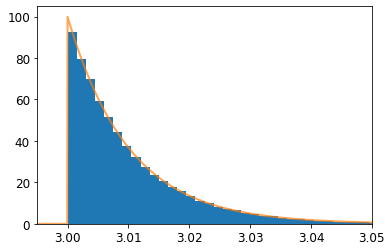

In [14]:
# Realization with ~100k samples
d = scipy.stats.gamma.rvs(1, loc = 3.0, scale = .01, size = 100000)

# Analytic PDF
fig, ax = plt.subplots(1, 1)
ax.hist(d,75, density=True)
plt.tick_params(labelsize = 12)
plt.xlim([2.995,3.05])
x = np.linspace(2.995,3.05,1000)
ax.plot(x,scipy.stats.gamma.pdf(a = 1, x = x,loc = 3, scale = 0.01),linewidth = 2,alpha = 0.7)
plt.show()

### &nbsp;&nbsp;&nbsp;3. Determine the 'sigma'

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A. Hypothetical Value

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.042

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; B. The statistical question

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; What is the probability of reciving a signal of 3.042 or higher?

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; C. Mathematical integral

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\int\limits_{3.042}^\infty {\dfrac{x^{a-1}e^{-x}}{\Gamma \left( x \right)}dx}$

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; D. Calculate the probability

In [15]:
# Porbability to see a signal of 3.042 or higher 
q = scipy.stats.gamma.sf(x = 3.042, a = 1, loc = 3, scale = 0.01)
q

0.014995576820477986

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; E. Equivalent 'sigma'

In [16]:
# Equivelant sigma on a normal distribution
scipy.stats.norm.isf(q = q)

2.1702071900967366

### &nbsp;&nbsp;&nbsp; 4. Explore values

In [17]:
# Porbability to see a signal of 3.07 or higher 
q = scipy.stats.gamma.sf(x = 3.05, a = 1, loc = 3, scale = 0.01)
print("Probability:\t" + str(q))
print("Sigma:\t\t" + str(scipy.stats.norm.isf(q = q)))

Probability:	0.006737946999085587
Sigma:		2.4709386372615825


In [18]:
# Porbability to see a signal of 3.17 or higher 
q = scipy.stats.gamma.sf(x = 3.17, a = 1, loc = 3, scale = 0.01)
print("Probability:\t" + str(q))
print("Sigma:\t\t" + str(scipy.stats.norm.isf(q = q)))

Probability:	4.1399377187851926e-08
Sigma:		5.360920932782273


In [19]:
# Porbability to see a signal of 3.0001 or higher 
q = scipy.stats.gamma.sf(x = 3.0001, a = 1, loc = 3, scale = 0.01)
print("Probability:\t" + str(q))
print("Sigma:\t\t" + str(scipy.stats.norm.isf(q = q)))

Probability:	0.9900498337491471
Sigma:		-2.328221737536387


In [20]:
# Porbability to see a signal of 3.007 or higher 
q = scipy.stats.gamma.sf(x = 3.007, a = 1, loc = 3, scale = 0.01)
print("Probability:\t" + str(q))
print("Sigma:\t\t" + str(scipy.stats.norm.isf(q = q)))

Probability:	0.49658530379140375
Sigma:		0.00855947858249478


## Non-continuous distributions